In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [11]:
"hello world"

'hello world'

In [3]:
pip install mysql-connector-python

   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   -- ------------------------------------- 1.0/16.1 MB 6.0 MB/s eta 0:00:03
   ----- ---------------------------------- 2.1/16.1 MB 5.6 MB/s eta 0:00:03
   --------- ------------------------------ 3.9/16.1 MB 6.6 MB/s eta 0:00:02
   ------------- -------------------------- 5.2/16.1 MB 6.9 MB/s eta 0:00:02
   --------------- ------------------------ 6.3/16.1 MB 6.5 MB/s eta 0:00:02
   ---------------- ----------------------- 6.8/16.1 MB 6.1 MB/s eta 0:00:02
   ---------------- ----------------------- 6.8/16.1 MB 6.1 MB/s eta 0:00:02
   ----------------- ---------------------- 7.1/16.1 MB 4.6 MB/s eta 0:00:02
   ------------------ --------------------- 7.3/16.1 MB 3.9 MB/s eta 0:00:03
   ------------------ --------------------- 7.6/16.1 MB 3.6 MB/s eta 0:00:03
   -------------------- ------------------- 8.4/16.1 MB 3.6 MB/s eta 0:00:03
   -------------------- ------------------- 8.4/16.1 MB 3.6 MB/s eta 0:00:03
   ---

In [4]:
pip install matplotlib

   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ------ --------------------------------- 1.3/7.8 MB 7.2 MB/s eta 0:00:01
   ------------- -------------------------- 2.6/7.8 MB 6.7 MB/s eta 0:00:01
   --------------------- ------------------ 4.2/7.8 MB 7.3 MB/s eta 0:00:01
   ------------------------------ --------- 6.0/7.8 MB 7.4 MB/s eta 0:00:01
   ------------------------------------ --- 7.1/7.8 MB 7.1 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 7.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   -------------- ------------------------- 0.8/2.2 MB 5.3 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 6.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   -------------------- ------------------- 1.3/2.6 MB 13.4 MB/s eta 0:00:01
   ------------------------------------ --- 2.4/2.6 MB 7.0 MB/s eta 0:00:01
   -----------------------------

In [5]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [10]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('geolocation.csv', 'geolocation'),
    ('payments.csv', 'payments'),
    ('order_items.csv', 'order_items')# Added payments.csv for specific handling
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='1234',
    database='ecommerce'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'C:\\Users\\riddh\\OneDrive\\Desktop\\ecomm'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()

Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Processing sellers.csv
NaN values before replacement:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Processing products.csv
NaN values before replacement:
product_id                      0
product category              610
product_name_length           610
product_description_length    610
product_photos_qty            610
prod

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector


db = mysql.connector.connect(
    host='localhost',
    user='root',
    password='1234',
    database='ecommerce')
cur = db.cursor()

# 1.List all unique cities where customers are located.

In [48]:
query = """ select distinct customer_city from customers """

cur.execute(query)
data = cur.fetchall()
data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

# 2. Count the number of orders placed in 2017.

In [17]:
query = """ select count(order_id) from orders where year(order_purchase_timestamp)= 2017 """

cur.execute(query)
data = cur.fetchall()
"total orders placed in 2017 are", data[0][0]

('total orders placed in 2017 are', 45101)

# 3. Count the number of customers from each state. 

In [37]:
query = """ select customer_state, count(customer_id)
from customers group by customer_state """

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data)
df

,0,1
0,SP,41746
1,SC,3637
2,MG,11635
3,PR,5045
4,RJ,12852
5,RS,5466
6,PA,975
7,GO,2020
8,ES,2033
9,BA,3380


# 4. Calculate the number of orders per month in 2018.

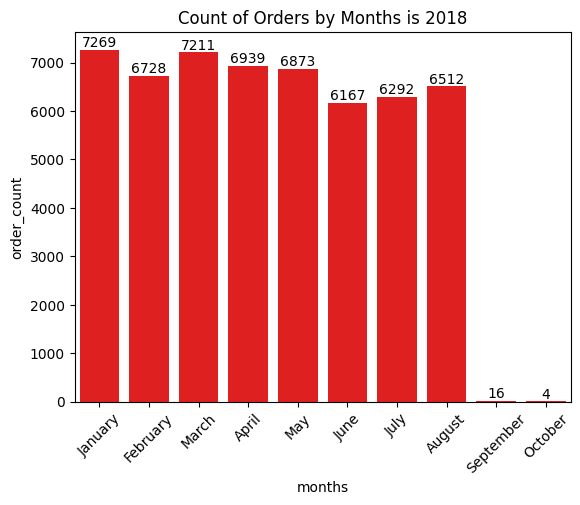

In [47]:
query = """
SELECT MONTHNAME(order_purchase_timestamp) AS months, 
       COUNT(order_id) AS order_count
FROM orders 
WHERE YEAR(order_purchase_timestamp) = 2018
GROUP BY MONTH(order_purchase_timestamp), MONTHNAME(order_purchase_timestamp)
ORDER BY MONTH(order_purchase_timestamp)
"""

cur.execute(query)
data = cur.fetchall()
data
df = pd.DataFrame(data, columns = ["months", "order_count"])
o = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October"]

ax = sns.barplot(x = df["months"],y = df["order_count"], data = df, order = o, color= "red")
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0])
plt.title("Count of Orders by Months is 2018")

plt.show()

# 5. Find the average number of products per order, grouped by customer city.

In [50]:
query = """
WITH count_per_order AS (
    SELECT orders.order_id, orders.customer_id, count(order_items.order_id) AS oc
    FROM orders JOIN order_items
    ON orders.order_id = order_items.order_id
    GROUP BY orders.order_id, orders.customer_id
)

SELECT customers.customer_city, 
       ROUND(AVG(count_per_order.oc), 2) AS average_order
FROM customers 
JOIN count_per_order 
ON customers.customer_id = count_per_order.customer_id
GROUP BY customers.customer_city
"""

cur.execute(query)
data = cur.fetchall()
data
df = pd.DataFrame(data,columns = ["customer city", "average products/order"])
df.head(10)

,customer city,average products/order
0,sao paulo,1.16
1,sao jose dos campos,1.14
2,porto alegre,1.17
3,indaial,1.12
4,treze tilias,1.27
5,rio de janeiro,1.15
6,mario campos,1.33
7,guariba,1.00
8,cuiaba,1.20
9,franca,1.25


# 6. Calculate the total revenue generated by each seller, and rank them by revenue.

In [57]:
query = """ select*, dense_rank() over(order by revenue desc) as rn from
(SELECT order_items.seller_id, SUM(payments.payment_value) revenue 
FROM order_items
JOIN payments ON order_items.order_id = payments.order_id
GROUP BY order_items.seller_id) as a
"""



cur.execute(query)
data = cur.fetchall()
data

[('7c67e1448b00f6e969d365cea6b010ab', 507166.9073021412, 1),
 ('1025f0e2d44d7041d6cf58b6550e0bfa', 308222.0398402214, 2),
 ('4a3ca9315b744ce9f8e9374361493884', 301245.26976528764, 3),
 ('1f50f920176fa81dab994f9023523100', 290253.42012761533, 4),
 ('53243585a1d6dc2643021fd1853d8905', 284903.0804977417, 5),
 ('da8622b14eb17ae2831f4ac5b9dab84a', 272219.31931465864, 6),
 ('4869f7a5dfa277a7dca6462dcf3b52b2', 264166.1209387779, 7),
 ('955fee9216a65b617aa5c0531780ce60', 236322.30050226487, 8),
 ('fa1c13f2614d7b5c4749cbc52fecda94', 206513.22986984253, 9),
 ('7e93a43ef30c4f03f38b393420bc753a', 185134.20970630646, 10),
 ('6560211a19b47992c3666cc44a7e94c0', 179657.74904833734, 11),
 ('7a67c85e85bb2ce8582c35f2203ad736', 169030.80002561212, 12),
 ('25c5c91f63607446a97b143d2d535d31', 160534.7397725582, 13),
 ('a1043bafd471dff536d0c462352beb48', 154356.91018915176, 14),
 ('46dc3b2cc0980fb8ec44634e21d2718e', 148864.3400707245, 15),
 ('b37c4c02bda3161a7546a4e6d222d5b2', 145319.04013061523, 16),
 ('620c

# 7. Calculate the moving average of order values for each customer over their order history.

In [59]:
query = """ select customer_id, order_purchase_timestamp, payment,
avg(payment) over(partition by customer_id order by order_purchase_timestamp rows between 2 preceding and current row) as mov_avg
from
(select orders.customer_id, orders.order_purchase_timestamp,
payments.payment_value as payment
from payments join orders
on payments.order_id = orders.order_id) as a
"""
cur.execute(query)
data = cur.fetchall()
data
df = pd.DataFrame(data)
df

,0,1,2,3
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.350006
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.010002
...,...,...,...,...
103881,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,0.64,27.120001
103882,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,63.13,63.130001
103883,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,214.13,214.130005
103884,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.500000


# 8. Calculate the cumulative sales per month for each year.

In [64]:
query = """ 
SELECT years, 
       months, 
       payment, 
       SUM(payment) OVER (ORDER BY years, months) AS cumulative_sales 
FROM (
    SELECT YEAR(orders.order_purchase_timestamp) AS years, 
           MONTH(orders.order_purchase_timestamp) AS months,
           ROUND(SUM(payments.payment_value), 2) AS payment 
    FROM orders 
    JOIN payments ON orders.order_id = payments.order_id 
    GROUP BY years, months
) AS a;
"""
cur.execute(query)
data = cur.fetchall()
data
df = pd.DataFrame(data)
df

,0,1,2,3
0,2016,9,252.24,252.24
1,2016,10,59090.48,59342.72
2,2016,12,19.62,59362.34
3,2017,1,138488.04,197850.38
4,2017,2,291908.01,489758.39
5,2017,3,449863.60,939621.99
6,2017,4,417788.03,1357410.02
7,2017,5,592918.82,1950328.84
8,2017,6,511276.38,2461605.22
9,2017,7,592382.92,3053988.14


# 9. Calculate the year-over-year growth rate of total sales.

In [76]:
query = """ 
WITH a AS (
    SELECT YEAR(orders.order_purchase_timestamp) AS years,
           ROUND(SUM(payments.payment_value), 2) AS payment 
    FROM orders 
    JOIN payments ON orders.order_id = payments.order_id 
    GROUP BY years 
    ORDER BY years
)

SELECT years, 
           ((payment - LAG(payment, 1) OVER(ORDER BY years)) /
           LAG(payment, 1) OVER(ORDER BY years)) * 100 AS previous_year
    FROM a;
"""
cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data, columns=["years", "yoy % growth"])
df

,years,yoy % growth
0,2016,NaN
1,2017,12112.703761
2,2018,20.000924


# 10. Identify the top 3 customers who spent the most money in each year.

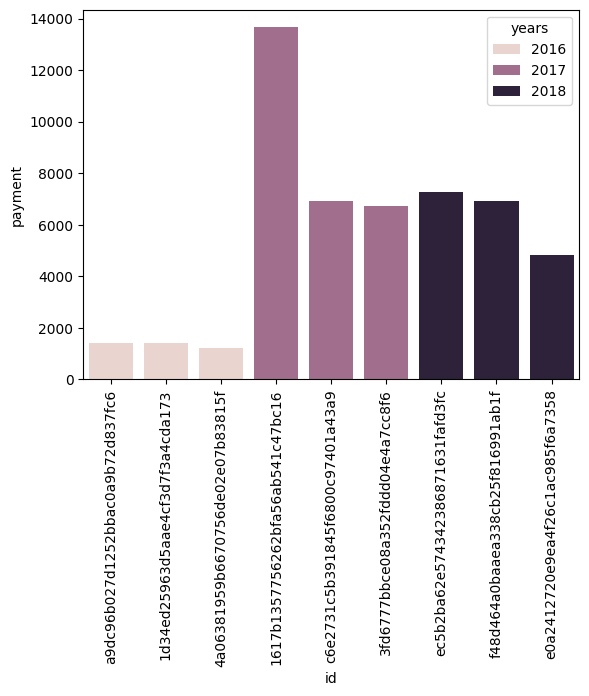

In [86]:
query = """
    SELECT years, customer_id, payment, d_rank
    FROM (
        SELECT YEAR(orders.order_purchase_timestamp) AS years,
               orders.customer_id,
               SUM(payments.payment_value) AS payment,
               DENSE_RANK() OVER(PARTITION BY YEAR(orders.order_purchase_timestamp)
                                 ORDER BY SUM(payments.payment_value) DESC) AS d_rank
        FROM orders
        JOIN payments ON payments.order_id = orders.order_id
        GROUP BY YEAR(orders.order_purchase_timestamp), orders.customer_id
    ) AS a
    WHERE d_rank <= 3;
"""

cur.execute(query)
data = cur.fetchall()
data
df = pd.DataFrame(data, columns=["years", "id", "payment", "rank"])
df
sns.barplot(x = "id", y = "payment", data = df, hue = "years")
plt.xticks(rotation = 90)
plt.show()
